In [1]:
# ===============================
# Step 0: Import Required Libraries
# ===============================
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import matplotlib.pyplot as plt

In [2]:
# ===============================
# Step 1: Generate Dataset
# ===============================
# 50 positive and 50 negative sentences (total 100)
sentences = [
    "I love this movie", "This film was amazing", "I enjoyed every moment",
    "The acting was great", "What a fantastic experience",
    "Absolutely wonderful movie", "The story was touching", "I liked the characters",
    "Very entertaining film", "This movie made me happy",
    
    "I hate this movie", "This film was terrible", "I disliked every moment",
    "The acting was awful", "What a boring experience",
    "Absolutely horrible movie", "The story was weak", "I hated the characters",
    "Very disappointing film", "This movie made me angry"
] * 5  # repeat to make 100 samples

# Corresponding labels
labels = ["positive"] * 50 + ["negative"] * 50

# Create a pandas DataFrame
df = pd.DataFrame({
    "sentence": sentences,
    "sentiment": labels
})


In [3]:
# ===============================
# Step 2: Text Cleaning
# ===============================
def clean_text(text):
    """
    Lowercase text and remove punctuation/numbers
    """
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["cleaned_sentence"] = df["sentence"].apply(clean_text)


In [4]:
# ===============================
# Step 3: Encode Labels
# ===============================
label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["sentiment"])
# positive=1, negative=0

In [5]:
# ===============================
# Step 4: Tokenization
# ===============================
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["cleaned_sentence"])
sequences = tokenizer.texts_to_sequences(df["cleaned_sentence"])

In [6]:
# ===============================
# Step 5: Padding
# ===============================
max_len = 6  # max number of words per sentence
X = pad_sequences(sequences, maxlen=max_len, padding="post")
y = df["sentiment_encoded"].values

In [7]:
# ===============================
# Step 6: Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# ===============================
# Step 7: Build LSTM Model
# ===============================
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_len),  # Word embeddings
    LSTM(32),                                                               # LSTM layer with 32 units
    Dense(1, activation="sigmoid")                                          # Output layer for binary classification
])


c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
# ===============================
# Step 8: Compile Model
# ===============================
model.compile(
    optimizer="adam",                # Adam optimizer
    loss="binary_crossentropy",      # Binary classification loss
    metrics=["accuracy"]             # Track accuracy
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# ===============================
# Step 9: Train Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    validation_data=(X_test, y_test)
)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3767 - loss: 0.6942 - val_accuracy: 0.4000 - val_loss: 0.6935
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4346 - loss: 0.6940 - val_accuracy: 0.4000 - val_loss: 0.6946
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5463 - loss: 0.6924 - val_accuracy: 0.4000 - val_loss: 0.6964
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4977 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6973
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5163 - loss: 0.6925 - val_accuracy: 0.4000 - val_loss: 0.6991
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6017 - loss: 0.6884 - val_accuracy: 0.4000 - val_loss: 0.7024
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5299 - loss: 0.6907 - val_accuracy: 0.4000 - val_loss: 0.7039
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5228 - loss: 0.6910 - val_accuracy: 0.4000 - v

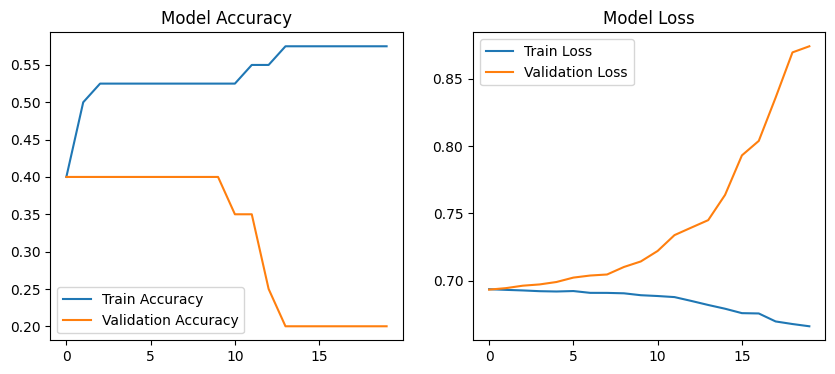

In [11]:
# ===============================
# Step 10: Plot Training History
# ===============================
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.legend()

plt.show()

In [12]:
# ===============================
# Step 11: Predict on New Sentences
# ===============================
def predict_sentiment(text):
    """
    Predict sentiment of a new sentence
    """
    # Clean text
    text = clean_text(text)
    # Convert to sequence
    seq = tokenizer.texts_to_sequences([text])
    # Pad sequence
    padded = pad_sequences(seq, maxlen=max_len, padding="post")
    # Predict
    prediction = model.predict(padded)
    return "Positive" if prediction[0][0] > 0.5 else "Negative"

# Test predictions
print(predict_sentiment("I really enjoyed this movie"))
print(predict_sentiment("This film was very boring"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Negative
